# Import Library

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras

# Load the Dataset

In [4]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
df

,Timestamp,Residents,Apartment_Type,Temperature,Humidity,Water_Price,Period_Consumption_Index,Income_Level,Guests,Amenities,Appliance_Usage,Water_Consumption
0,01/01/2002 00,1,Studio,15.31,46.61,1.06,0.970000,Low,0,Swimming Pool,0.0,64.85
1,01/01/2002 08,4,NaN,21.01,66.11,2.98,0.910000,Upper Middle,1,Swimming Pool,1.0,192.50
2,01/01/2002 16,2,Cottage,12.86,60.86,1.44,1.430000,Middle,0,NaN,1.0,116.62
3,02/01/2002 00,2,1BHK,20.16,50.58,1.48,0.910000,Middle,-1,Garden,0.0,76.96
4,02/01/2002 08,2,Cottage,16.23,52.25,1.14,1.110000,Middle,0,Fountain,0.0,104.70
...,...,...,...,...,...,...,...,...,...,...,...,...
13995,10/10/2014 00,2,1BHK,25.61,61.5,1.70,0.940000,Low,0,NaN,0.0,78.59
13996,10/10/2014 08,5,2BHK,13.27,52.58,1.88,1.030000,Upper Middle,0,Garden,1.0,185.50
13997,10/10/2014 16,4,2BHK,NaN,46.93,1.22,1.100000,Middle,0,NaN,1.0,180.28
13998,11/10/2014 00,4,3BHK,11.62,64.48,2.86,1.120000,Upper Middle,1,Swimming Pool,0.0,212.19


In [6]:
test.head()

,Timestamp,Residents,Apartment_Type,Temperature,Humidity,Water_Price,Period_Consumption_Index,Income_Level,Guests,Amenities,Appliance_Usage
0,11/10/2014 16,5,Bungalow,11.89,57.88,2.77,1.48,Upper Middle,1,Jacuzzi,0.0
1,12/10/2014 00,4,Bungalow,29.22,61.41,2.85,1.30,Upper Middle,0,Garden,NaN
2,12/10/2014 08,3,Cottage,10.27,64.9,1.66,0.97,Middle,0,NaN,0.0
3,12/10/2014 16,3,1BHK,27.03,52.67,1.48,1.31,Low,0,NaN,0.0
4,13/10/2014 00,2,Cottage,12.32,55.23,1.19,1.30,Middle,0,Swimming Pool,0.0


# Exploratory Data Analysis

In [7]:
df.drop(columns = 'Timestamp',axis = 0,inplace = True)

In [8]:
df.head()

,Residents,Apartment_Type,Temperature,Humidity,Water_Price,Period_Consumption_Index,Income_Level,Guests,Amenities,Appliance_Usage,Water_Consumption
0,1,Studio,15.31,46.61,1.06,0.97,Low,0,Swimming Pool,0.0,64.85
1,4,NaN,21.01,66.11,2.98,0.91,Upper Middle,1,Swimming Pool,1.0,192.50
2,2,Cottage,12.86,60.86,1.44,1.43,Middle,0,NaN,1.0,116.62
3,2,1BHK,20.16,50.58,1.48,0.91,Middle,-1,Garden,0.0,76.96
4,2,Cottage,16.23,52.25,1.14,1.11,Middle,0,Fountain,0.0,104.70


In [9]:
df.loc[df['Residents'] < 0, 'Residents'] = np.nan
test.loc[test['Residents'] < 0, 'Residents'] = np.nan

In [10]:
df['Residents'].fillna(df['Residents'].mode()[0], inplace=True)
test['Residents'].fillna(test['Residents'].mode()[0], inplace=True)

# Correct The Entry

### Humidity

In [11]:
#  Step 1: Convert non-numeric values to NaN
df['Humidity'] = pd.to_numeric(df['Humidity'], errors='coerce')

# Step 2: Handle missing (NaN) values
df['Humidity'].fillna(df['Humidity'].mean(), inplace=True)

df.loc[df['Humidity'] < 0, 'Humidity'] = 0
df.loc[df['Humidity'] > 100, 'Humidity'] = 100

In [12]:
#  Step 1: Convert non-numeric values to NaN
test['Humidity'] = pd.to_numeric(test['Humidity'], errors='coerce')

# Step 2: Handle missing (NaN) values
test['Humidity'].fillna(test['Humidity'].mean(), inplace=True)

test.loc[test['Humidity'] < 0, 'Humidity'] = 0
test.loc[test['Humidity'] > 100, 'Humidity'] = 100

### Period_Consumption_Index

In [13]:
df.loc[df['Period_Consumption_Index'] < 0, 'Period_Consumption_Index'] = 0
test.loc[test['Period_Consumption_Index'] < 0, 'Period_Consumption_Index'] = 0

### Guests

In [14]:
df.loc[df['Guests'] < 0, 'Guests'] = 0
test.loc[test['Guests'] < 0, 'Guests'] = 0

### Water_Price

In [15]:
df.loc[df['Water_Price'] < 0, 'Water_Price'] = 0
df.loc[df['Water_Price'] == 0, 'Water_Price'] = df['Water_Price'].mean()

test.loc[test['Water_Price'] < 0, 'Water_Price'] = 0
test.loc[test['Water_Price'] == 0, 'Water_Price'] = test['Water_Price'].mean()

### Income_Level

In [16]:
valid_categories = ["Low", "Middle", "Upper Middle", "Rich"]

# Step 2: Convert invalid values to NaN
df.loc[~df['Income_Level'].isin(valid_categories), 'Income_Level'] = None  # Set invalid values to NaN

# Step 3: Fill missing values with the mode (most frequent category)
df['Income_Level'].fillna(df['Income_Level'].mode()[0], inplace=True)

In [17]:
valid_categories = ["Low", "Middle", "Upper Middle", "Rich"]

# Step 2: Convert invalid values to NaN
test.loc[~test['Income_Level'].isin(valid_categories), 'Income_Level'] = None  # Set invalid values to NaN

# Step 3: Fill missing values with the mode (most frequent category)
test['Income_Level'].fillna(test['Income_Level'].mode()[0], inplace=True)

# NULL Value

In [18]:
df.isnull().sum()

Residents                      0
Apartment_Type               426
Temperature                  441
Humidity                       0
Water_Price                    0
Period_Consumption_Index       0
Income_Level                   0
Guests                         0
Amenities                   5997
Appliance_Usage              415
Water_Consumption              0
dtype: int64

In [19]:
df['Apartment_Type'].fillna(df['Apartment_Type'].mode()[0], inplace=True)  # Mode for categorical data
df['Income_Level'].fillna(df['Income_Level'].mode()[0], inplace=True)      # Mode for categorical data
df['Temperature'].fillna(df['Temperature'].mean(), inplace=True)           # Mean for numerical data
df['Appliance_Usage'].fillna(df['Appliance_Usage'].mean(), inplace=True)   # Mean for numerical data
df['Amenities'].fillna("None", inplace=True)

In [20]:
test.isnull().sum()

Timestamp                      0
Residents                      0
Apartment_Type               166
Temperature                  150
Humidity                       0
Water_Price                    0
Period_Consumption_Index       0
Income_Level                   0
Guests                         0
Amenities                   2513
Appliance_Usage              177
dtype: int64

In [21]:
test['Apartment_Type'].fillna(test['Apartment_Type'].mode()[0], inplace=True)  # Mode for categorical data
test['Temperature'].fillna(test['Temperature'].mean(), inplace=True)           # Mean for numerical data
test['Appliance_Usage'].fillna(test['Appliance_Usage'].mean(), inplace=True)   # Mean for numerical data
test['Amenities'].fillna("None", inplace=True)

# Data Analysis

In [22]:
df.head()

,Residents,Apartment_Type,Temperature,Humidity,Water_Price,Period_Consumption_Index,Income_Level,Guests,Amenities,Appliance_Usage,Water_Consumption
0,1.0,Studio,15.31,46.61,1.06,0.97,Low,0,Swimming Pool,0.0,64.85
1,4.0,2BHK,21.01,66.11,2.98,0.91,Upper Middle,1,Swimming Pool,1.0,192.50
2,2.0,Cottage,12.86,60.86,1.44,1.43,Middle,0,None,1.0,116.62
3,2.0,1BHK,20.16,50.58,1.48,0.91,Middle,0,Garden,0.0,76.96
4,2.0,Cottage,16.23,52.25,1.14,1.11,Middle,0,Fountain,0.0,104.70


<Axes: xlabel='Residents'>

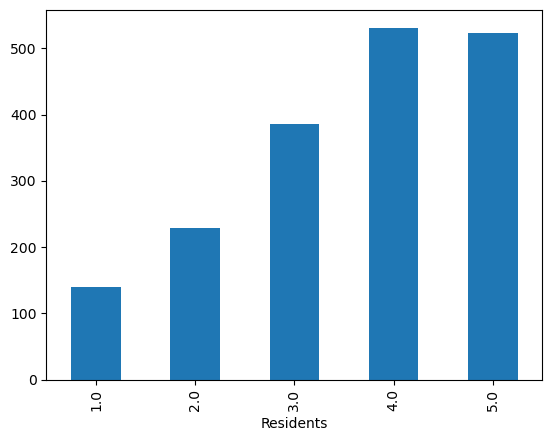

In [23]:
df.groupby('Residents')['Water_Consumption'].max().plot(kind = 'bar')

<Axes: xlabel='Apartment_Type'>

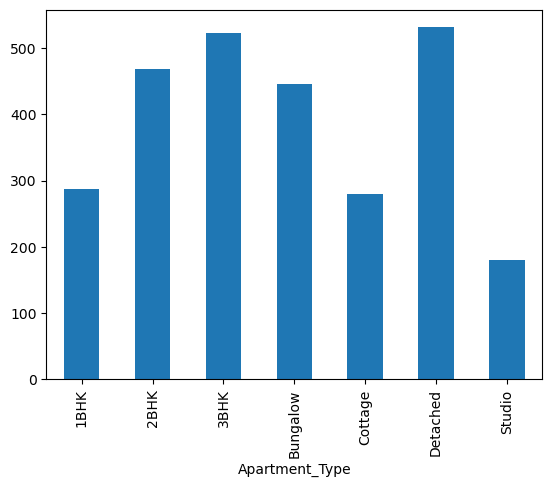

In [24]:
df.groupby('Apartment_Type')['Water_Consumption'].max().plot(kind = 'bar')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Residents                 14000 non-null  float64
 1   Apartment_Type            14000 non-null  object 
 2   Temperature               14000 non-null  float64
 3   Humidity                  14000 non-null  float64
 4   Water_Price               14000 non-null  float64
 5   Period_Consumption_Index  14000 non-null  float64
 6   Income_Level              14000 non-null  object 
 7   Guests                    14000 non-null  int64  
 8   Amenities                 14000 non-null  object 
 9   Appliance_Usage           14000 non-null  float64
 10  Water_Consumption         14000 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 1.2+ MB


<Axes: xlabel='Income_Level'>

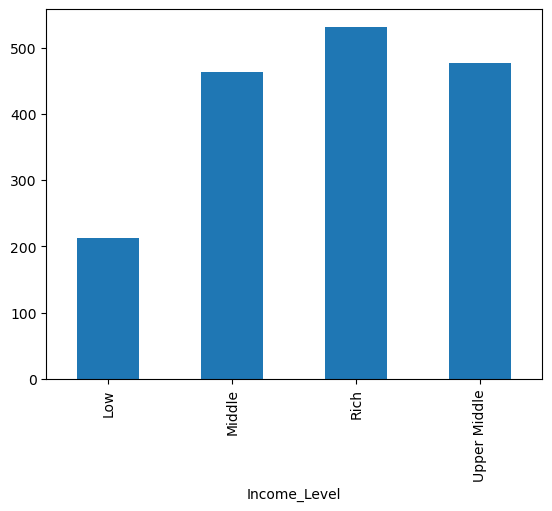

In [26]:
df.groupby('Income_Level')['Water_Consumption'].max().plot(kind='bar')

<Axes: xlabel='Amenities'>

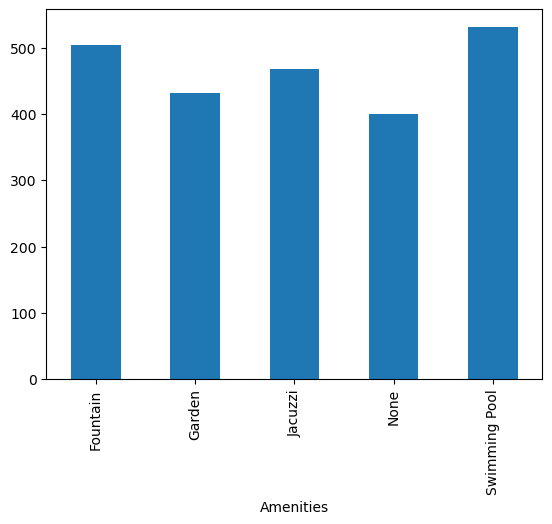

In [27]:
df.groupby('Amenities')['Water_Consumption'].max().plot(kind='bar')

<Axes: >

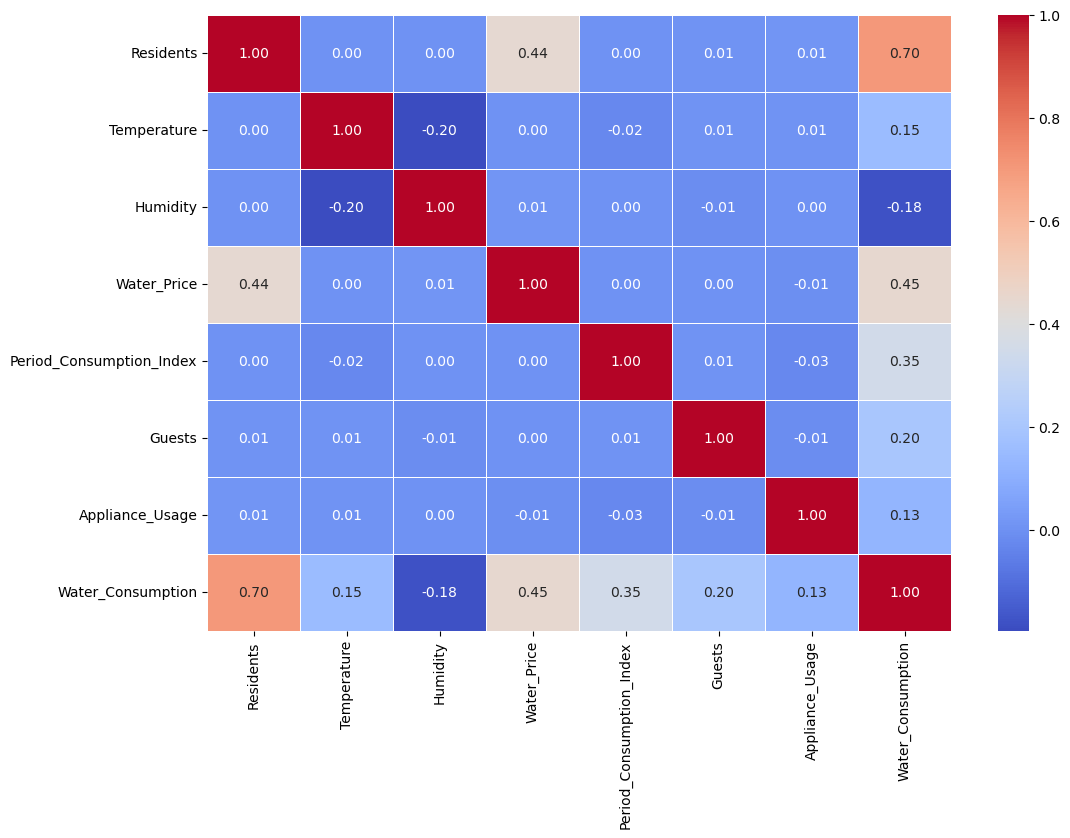

In [28]:
df_1 = df.drop(columns = ['Apartment_Type','Amenities','Income_Level'])
plt.figure(figsize=(12, 8))
sns.heatmap(df_1.corr(),annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Outlier Detection

<Axes: ylabel='Humidity'>

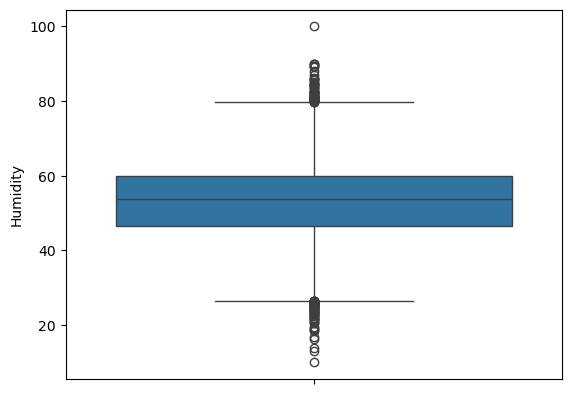

In [29]:
sns.boxplot(data = df,y = 'Humidity')

<Axes: ylabel='Period_Consumption_Index'>

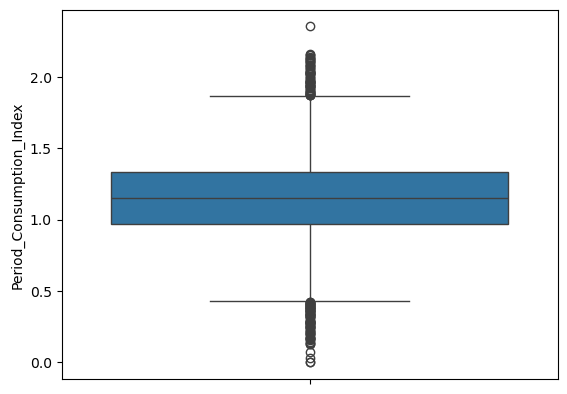

In [30]:
sns.boxplot(data = df,y = 'Period_Consumption_Index')

In [31]:
def outlier_removal(df,col):

  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)

  IQR = Q3-Q1

  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR

  df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


  return df

In [32]:
columns = ['Period_Consumption_Index','Humidity']

for c in columns:

  df = outlier_removal(df,c)

# Label Encoding and Hot Encoding

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13725 entries, 0 to 13998
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Residents                 13725 non-null  float64
 1   Apartment_Type            13725 non-null  object 
 2   Temperature               13725 non-null  float64
 3   Humidity                  13725 non-null  float64
 4   Water_Price               13725 non-null  float64
 5   Period_Consumption_Index  13725 non-null  float64
 6   Income_Level              13725 non-null  object 
 7   Guests                    13725 non-null  int64  
 8   Amenities                 13725 non-null  object 
 9   Appliance_Usage           13725 non-null  float64
 10  Water_Consumption         13725 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 1.3+ MB


In [34]:
def label_encoder(df, test, col):
    lb = LabelEncoder()

    df[col] = lb.fit_transform(df[col])

    test[col] = lb.transform(test[col])

    return df, test

In [35]:
columns = ['Apartment_Type','Income_Level','Amenities']

for col in columns:
  df,test = label_encoder(df,test,col)

In [36]:
df.head()

,Residents,Apartment_Type,Temperature,Humidity,Water_Price,Period_Consumption_Index,Income_Level,Guests,Amenities,Appliance_Usage,Water_Consumption
0,1.0,6,15.31,46.61,1.06,0.97,0,0,4,0.0,64.85
1,4.0,1,21.01,66.11,2.98,0.91,3,1,4,1.0,192.50
2,2.0,4,12.86,60.86,1.44,1.43,1,0,3,1.0,116.62
3,2.0,0,20.16,50.58,1.48,0.91,1,0,1,0.0,76.96
4,2.0,4,16.23,52.25,1.14,1.11,1,0,0,0.0,104.70


# Standarisation and Normalisation

In [37]:

def scale(df,test,col):

  sc = MinMaxScaler()
  df[col] = sc.fit_transform(df[[col]])
  test[col] = sc.transform(test[[col]])

  return df,test

In [38]:
columns = df.columns.tolist()[:-1]
for col in columns:

  df,test = scale(df,test,col)

In [39]:
df.head()

,Residents,Apartment_Type,Temperature,Humidity,Water_Price,Period_Consumption_Index,Income_Level,Guests,Amenities,Appliance_Usage,Water_Consumption
0,0.00,1.000000,0.2124,0.378404,0.03,0.377104,0.000000,0.000000,1.00,0.0,64.85
1,0.75,0.166667,0.4404,0.744601,0.99,0.335192,1.000000,0.333333,1.00,1.0,192.50
2,0.25,0.666667,0.1144,0.646009,0.22,0.698430,0.333333,0.000000,0.75,1.0,116.62
3,0.25,0.000000,0.4064,0.452958,0.24,0.335192,0.333333,0.000000,0.25,0.0,76.96
4,0.25,0.666667,0.2492,0.484319,0.07,0.474899,0.333333,0.000000,0.00,0.0,104.70


# Split The Data

In [40]:
x = df.drop(columns = ['Water_Consumption'],axis = 0)
y = df['Water_Consumption']

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model Building

In [43]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)  # Output layer for regression
])

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae:.4f}")
predictions = model.predict(X_test)

Epoch 1/50
687/687 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 15988.5176 - mae: 97.3092 - val_loss: 1753.2399 - val_mae: 32.3086
Epoch 2/50
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1559.9048 - mae: 28.7710 - val_loss: 1291.5393 - val_mae: 25.5436
Epoch 3/50
687/687 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1240.3289 - mae: 25.5158 - val_loss: 1205.4642 - val_mae: 24.7705
Epoch 4/50
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1171.9458 - mae: 24.8239 - val_loss: 1123.5039 - val_mae: 24.1158
Epoch 5/50
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1077.6698 - mae: 23.5982 - val_loss: 1081.9235 - val_mae: 23.5407
Epoch 6/50
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1006.4214 - mae: 22.8006 - val_loss: 1045.3165 - val_mae: 23.2259
Epoch 7/50
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 956.5771 - mae: 22.5017 - val_loss: 995.6452 - val_mae: 22.8026
Epoch 8/50
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 999.8989 - mae: 22.5627 - val_loss: 970.4283 - val_mae: 22.

In [44]:
y_pred = model.predict(X_test)

# Compute error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")  # Closer to 1 means better fit


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Absolute Error (MAE): 163.1639
Mean Squared Error (MSE): 31762.1206
Root Mean Squared Error (RMSE): 178.2193
R² Score: -5.1603


In [45]:
test.head()

,Timestamp,Residents,Apartment_Type,Temperature,Humidity,Water_Price,Period_Consumption_Index,Income_Level,Guests,Amenities,Appliance_Usage
0,11/10/2014 16,1.00,0.500000,0.0756,0.590047,0.885,0.733357,1.000000,0.333333,0.50,0.000000
1,12/10/2014 00,0.75,0.500000,0.7688,0.656338,0.925,0.607621,1.000000,0.000000,0.25,0.198695
2,12/10/2014 08,0.50,0.666667,0.0108,0.721878,0.330,0.377104,0.333333,0.000000,0.75,0.000000
3,12/10/2014 16,0.50,0.000000,0.6812,0.492207,0.240,0.614606,0.000000,0.000000,0.75,0.000000
4,13/10/2014 00,0.25,0.666667,0.0928,0.540282,0.095,0.607621,0.333333,0.000000,1.00,0.000000


# Predict the Test Case

In [46]:
time_stamp = test['Timestamp']
test = test.drop(columns = ['Timestamp'],axis = 0)

In [47]:
df_1 = pd.DataFrame(model.predict(test))

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [48]:
df_combined = pd.concat([time_stamp,df_1], axis=1)

In [49]:
df_combined.rename(columns={0 : 'Water_Consumption'}, inplace=True)

In [50]:
df_combined

,Timestamp,Water_Consumption
0,11/10/2014 16,0.601552
1,12/10/2014 00,0.741527
2,12/10/2014 08,0.317340
3,12/10/2014 16,0.536439
4,13/10/2014 00,0.281734
...,...,...
5995,01/04/2020 00,0.349791
5996,01/04/2020 08,0.308444
5997,01/04/2020 16,0.530352
5998,02/04/2020 00,0.532166


In [52]:
import pickle

pickle.dump(model, open('model.pkl', 'wb'))